<a href="https://colab.research.google.com/github/sisi195/Attention-Blitz/blob/main/MarketMind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MarketMind - Machine Learning for Marketing Optimization
## Analyzing User Interaction with Online Ads
## PROJECT GOALS & QUESTIONS:

## For Social Network Ads Dataset:
   1. What demographic factors influence purchasing decisions?
   2. How does estimated salary correlate with product purchases?
   3. Can we predict purchases based on age and gender?
   4. What trends can be identified to improve ad targeting strategies?

## For Consumer Behavior Dataset:
  1. What factors influence user engagement and conversion rates?
  2. How do demographics correlate with ad performance?
  3. Can predictive models enhance ad targeting strategies?

## Techniques used:
 - EDA: Pandas, Matplotlib, Seaborn
 - Classification: Logistic Regression (baseline), ensemble models (Random Forest, Gradient Boosting)
 - Data Balancing: SMOTE
 - Clustering: K-Means

## Importing necessary libraries


In [ ]:
!pip install plotly

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Modeling and evaluation tools:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans

## DATA LOADING & OVERVIEW

In [ ]:
# Load Social Network Ads dataset
social_data = pd.read_csv('social_network_Adscleaned.csv')
print("# Social Network Data Info:")
print(social_data.info())
print("\n# Social Network Data Head:")
print(social_data.head())

# Load Consumer Behavior dataset
consumer_data = pd.read_csv('CONSUMERBEHAVIOR.csv')
print("\n# Consumer Behavior Data Info:")
print(consumer_data.info())
print("\n# Consumer Behavior Data Head:")
print(consumer_data.head())

# Social Network Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Made Purchase    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

# Social Network Data Head:
    User ID  Gender  Age  EstimatedSalary  Made Purchase
0  15624510    Male   19            19000              0
1  15810944    Male   35            20000              0
2  15668575  Female   26            43000              0
3  15603246  Female   27            57000              0
4  15804002    Male   19            76000              0

# Consumer Behavior Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1

# EXPLORATORY DATA ANALYSIS (EDA)
- What trends, distributions, and potential correlations exist in the data?
- How is ad performance measured? What does CTR look like and how often are ads converting?

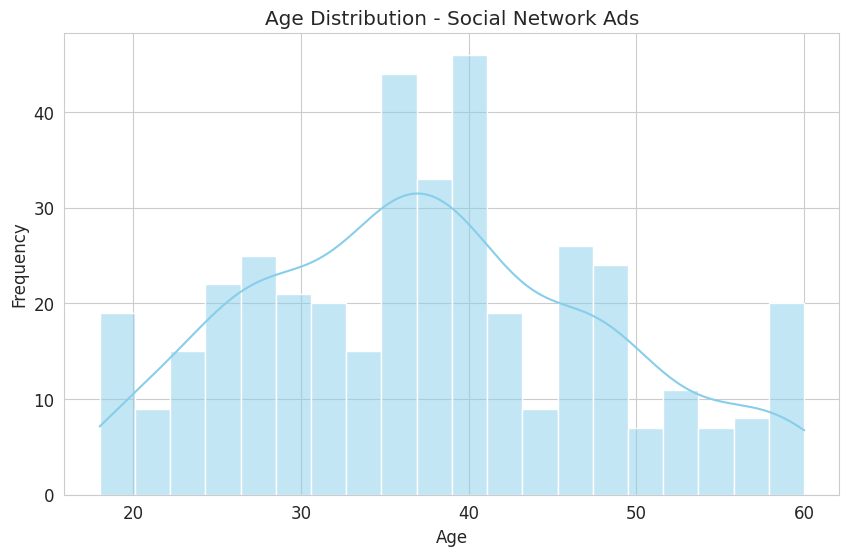

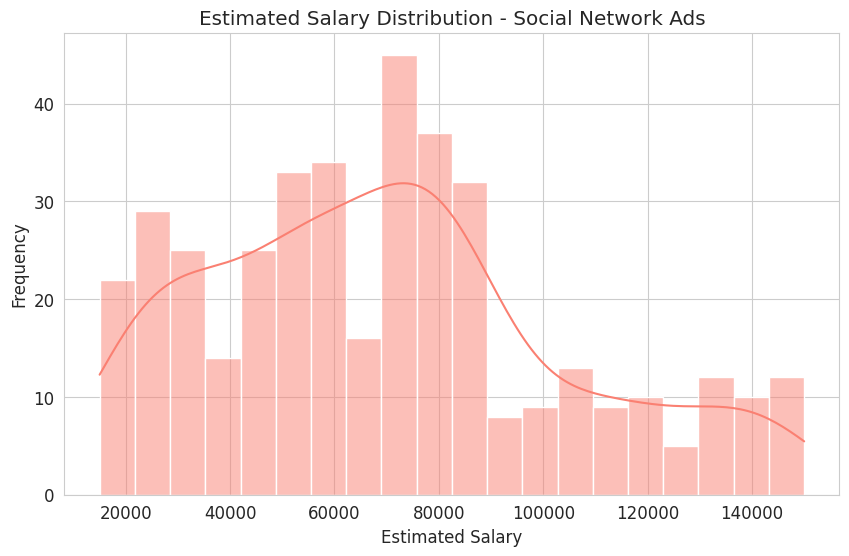

<ipython-input-194-8ca928f64c10>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




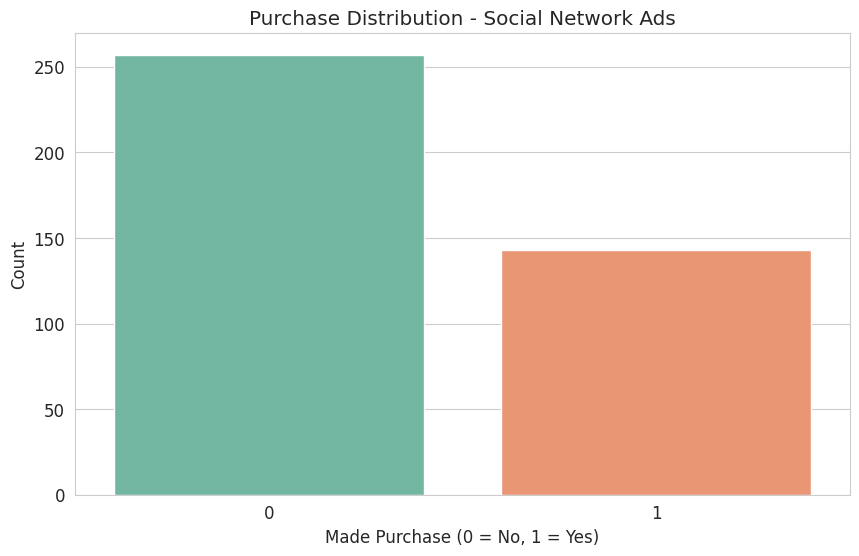

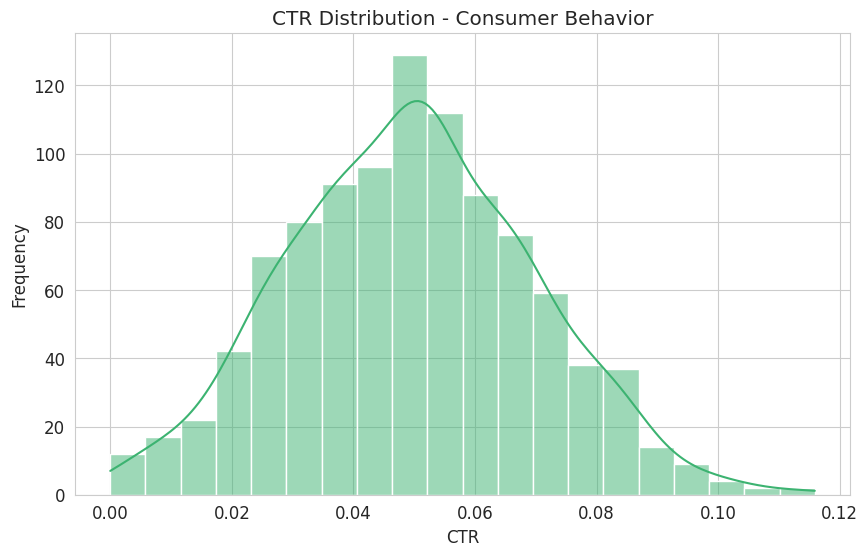

<ipython-input-194-8ca928f64c10>:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




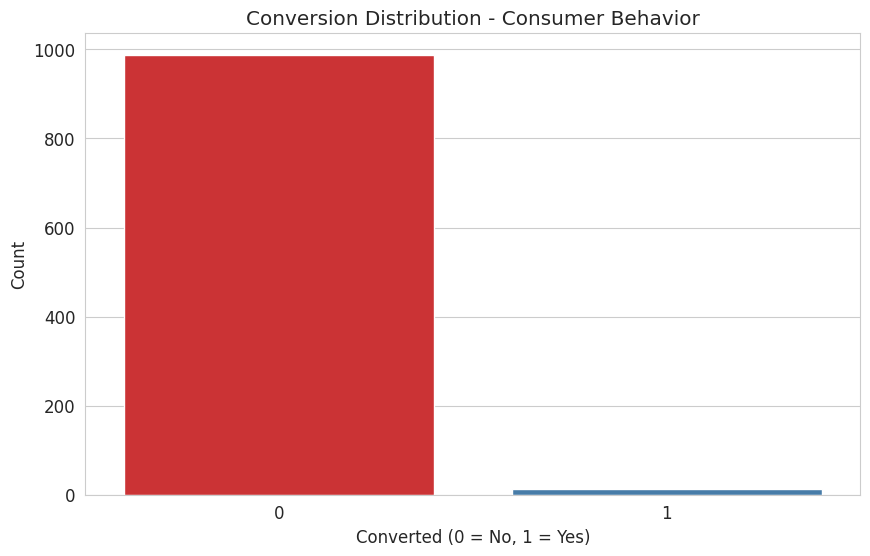

In [ ]:
# --- Social Network Ads EDA ---
# Histogram: Age distribution
plt.figure()
sns.histplot(social_data['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution - Social Network Ads")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram: Estimated Salary distribution
plt.figure()
sns.histplot(social_data['EstimatedSalary'], bins=20, kde=True, color='salmon')
plt.title("Estimated Salary Distribution - Social Network Ads")
plt.xlabel("Estimated Salary")
plt.ylabel("Frequency")
plt.show()

# Count plot: Made Purchase (target)
plt.figure()
sns.countplot(x='Made Purchase', data=social_data, palette="Set2")
plt.title("Purchase Distribution - Social Network Ads")
plt.xlabel("Made Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# --- Consumer Behavior EDA ---
# Encode Ad Type (feature)
le = LabelEncoder()
consumer_data['Ad_Type_Encoded'] = le.fit_transform(consumer_data['Ad Type'])

plt.figure()
sns.histplot(consumer_data['CTR'], bins=20, kde=True, color='mediumseagreen')
plt.title("CTR Distribution - Consumer Behavior")
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.show()

# Create binary target 'Converted': if Conversion Rate > 0.5 then 1, else 0.
consumer_data['Converted'] = (consumer_data['Conversion Rate'] > 0.5).astype(int)
plt.figure()
sns.countplot(x='Converted', data=consumer_data, palette="Set1")
plt.title("Conversion Distribution - Consumer Behavior")
plt.xlabel("Converted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# DATA PREPARATION FOR MODELING
- Predicting purchases based on age and gender

In [ ]:
# --- Social Network Ads Data Preparation ---
gender_le = LabelEncoder()
social_data['Gender_Encoded'] = gender_le.fit_transform(social_data['Gender'])

# Define features and target for Social Network Ads.
X_social = social_data[['Age', 'EstimatedSalary', 'Gender_Encoded']].to_numpy()
y_social = social_data['Made Purchase'].to_numpy()

# --- Consumer Behavior Data Preparation ---
X_consumer = consumer_data[['CTR', 'Ad_Type_Encoded']].to_numpy()
y_consumer = consumer_data['Converted'].to_numpy()

# MODEL TRAINING & EVALUATION
- Can we predict behavior/purchases accurately using classification models?

Social Network Ads Model Score: 0.8125
Social Network Ads Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.82      0.62      0.71        29

    accuracy                           0.81        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.81      0.81      0.81        80

Social Network Ads Confusion Matrix:
 [[47  4]
 [11 18]]


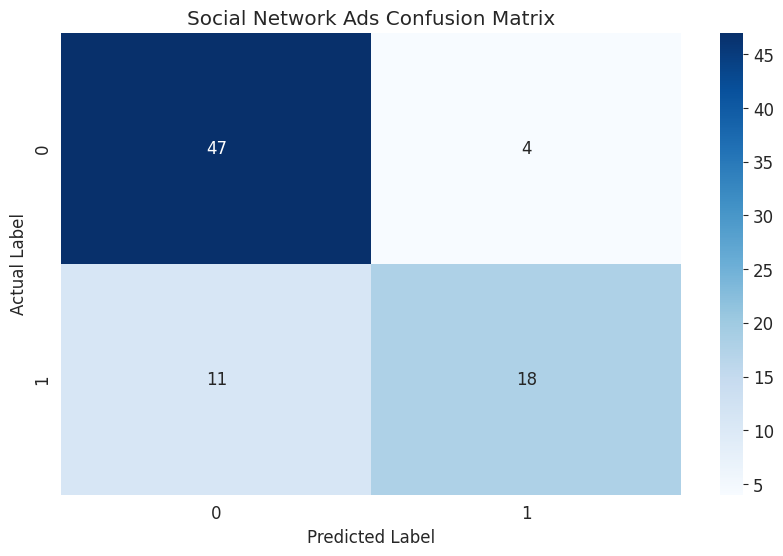

After SMOTE, class distribution:
 0    988
1    988
Name: count, dtype: int64
Random Forest Model Score (Consumer Behavior): 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Gradient Boosting Model Score (Consumer Behavior): 0.77
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       198
           1       0.04      1.00      0.08         2

    accuracy                           0.77       200
   macro avg       0.52      0.88      0.47       200
weighted avg       0.99      0.77      0.86       200



In [ ]:
# ---- Social Network Ads Modeling (Logistic Regression) ----
X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(
    X_social, y_social, test_size=0.2, random_state=42, stratify=y_social)
model_social = LogisticRegression()
model_social.fit(X_train_social, y_train_social)
y_pred_social = model_social.predict(X_test_social)

print("Social Network Ads Model Score:", model_social.score(X_test_social, y_test_social))
print("Social Network Ads Classification Report:\n", classification_report(y_test_social, y_pred_social))
print("Social Network Ads Confusion Matrix:\n", confusion_matrix(y_test_social, y_pred_social))

plt.figure()
sns.heatmap(confusion_matrix(y_test_social, y_pred_social), annot=True, fmt='d', cmap='Blues')
plt.title("Social Network Ads Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# ---- Consumer Behavior Modeling with SMOTE & Ensemble Methods ----
# SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_consumer_smote, y_train_consumer_smote = smote.fit_resample(X_consumer, y_consumer)
print("After SMOTE, class distribution:\n", pd.Series(y_train_consumer_smote).value_counts())

# Split the SMOTE-adjusted
X_train_consumer, X_test_consumer, y_train_consumer, y_test_consumer = train_test_split(
    X_consumer, y_consumer, test_size=0.2, random_state=42, stratify=y_consumer)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_consumer_smote, y_train_consumer_smote)
y_pred_rf = rf_model.predict(X_test_consumer)
print("Random Forest Model Score (Consumer Behavior):", rf_model.score(X_test_consumer, y_test_consumer))
print("Random Forest Classification Report:\n", classification_report(y_test_consumer, y_pred_rf, zero_division=0))

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_consumer_smote, y_train_consumer_smote)
y_pred_gb = gb_model.predict(X_test_consumer)
print("Gradient Boosting Model Score (Consumer Behavior):", gb_model.score(X_test_consumer, y_test_consumer))
print("Gradient Boosting Classification Report:\n", classification_report(y_test_consumer, y_pred_gb, zero_division=0))

#  CLUSTERING WITH K-MEANS
- Can clustering reveal underlying user segments in the Social Network Ads data?

Cluster counts:
 Cluster
0    189
1    137
2     74
Name: count, dtype: int64


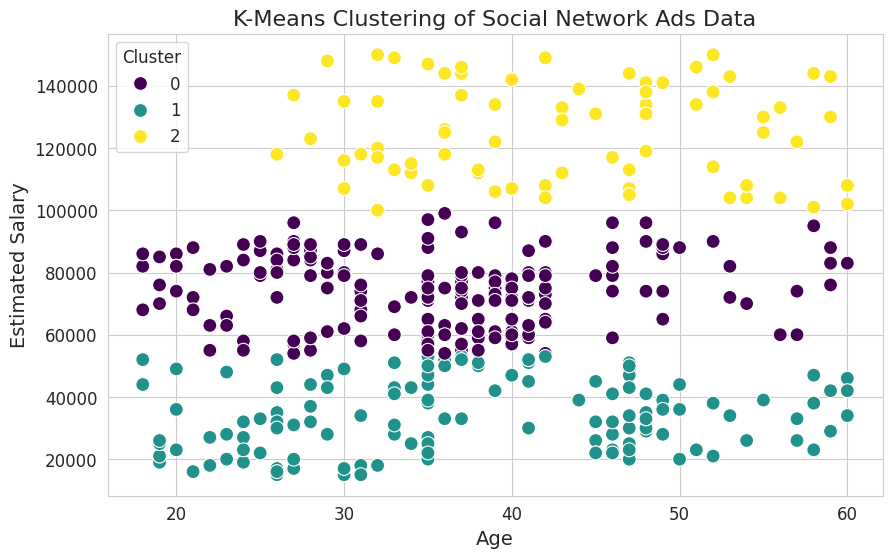

In [ ]:
# Features for clustering
features_for_clustering = social_data[['Age', 'EstimatedSalary']]
# Define number of clusters, e.g., 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
social_data['Cluster'] = kmeans.fit_predict(features_for_clustering)
print("Cluster counts:\n", social_data['Cluster'].value_counts())

plt.figure()
sns.scatterplot(data=social_data, x='Age', y='EstimatedSalary', hue='Cluster', palette='viridis', s=100)
plt.title("K-Means Clustering of Social Network Ads Data", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Estimated Salary", fontsize=14)
plt.legend(title="Cluster", fontsize=12)
plt.show()

# CONCLUSION & FUTURE EXPLORATION
## For Social Network Ads:
  - We examined demographic factors (Age, Gender, EstimatedSalary) influencing purchase decisions.
  - We assessed how estimated salary correlates with purchases.
  - Our classification model predicts purchases based on age and gender (among other features).
  - Clustering revealed user segments that can inform better ad targeting.

## For Consumer Behavior:
  - We analyzed engagement via CTR and conversion rates.
  - Ensemble models (with SMOTE) helped handle class imbalance and improve
   prediction.
  - Our insights can enhance ad targeting strategies.
